In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.dataset import SegDataset

In [3]:
train_img_dir = '../data/road_segmentation_ideal/training/input'
train_mask_dir = '../data/road_segmentation_ideal/training/output'
test_img_dir = '../data/road_segmentation_ideal/testing/input'
test_mask_dir = '../data/road_segmentation_ideal/testing/output'
train_ids = sorted([filename.split('.')[0] for filename in os.listdir(train_mask_dir) if filename.endswith('.png')])
test_ids = sorted([filename.split('.')[0] for filename in os.listdir(test_mask_dir) if filename.endswith('.png')])

print(f'Train samples: {len(train_ids)} Test samples: {len(test_ids)}')

Train samples: 804 Test samples: 13


In [4]:
train_dataset = SegDataset(train_img_dir, train_mask_dir, train_ids)

(1500, 1500, 3) (1500, 1500)


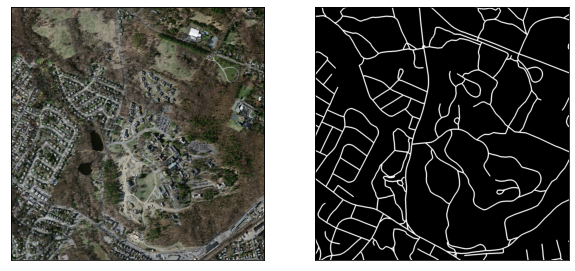

In [5]:
idx = np.random.randint(0, len(train_dataset))
img, mask = train_dataset[idx]
print(img.shape, mask.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
import albumentations as A

In [7]:
img_size = 512
train_transforms = A.Compose([ A.Resize(height=img_size, width=img_size, p=1), 
                         A.HorizontalFlip(p=0.5),
                         A.VerticalFlip(p=0.5), 
                         A.RandomRotate90(p=0.5),
                         A.Transpose(p=0.5)])

test_transforms = A.Resize(height=img_size, width=img_size, p=1)                         


In [8]:
train_dataset_tf = SegDataset(train_img_dir, train_mask_dir, train_ids, train_transforms)

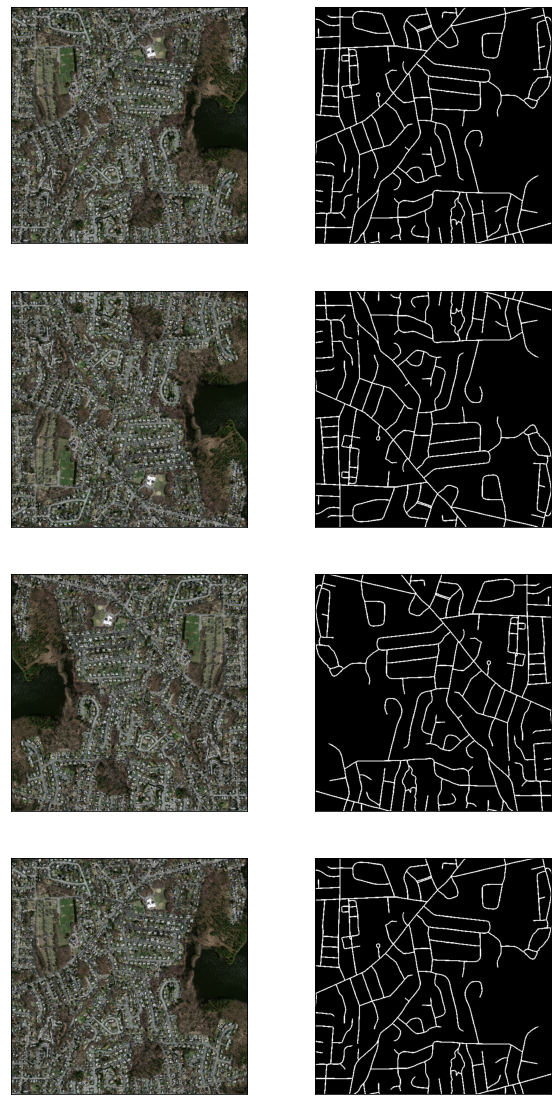

In [9]:
idx = np.random.randint(0, len(train_dataset_tf))
plt.figure(figsize=(10, 20))
#plt.tight_layout()
for i in range(4):
    img, mask = train_dataset_tf[idx]
    plt.subplot(4, 2, i*2+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4, 2, i*2+2)
    plt.imshow(mask, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
test_dataset = SegDataset(test_img_dir, test_mask_dir, test_ids, test_transforms)

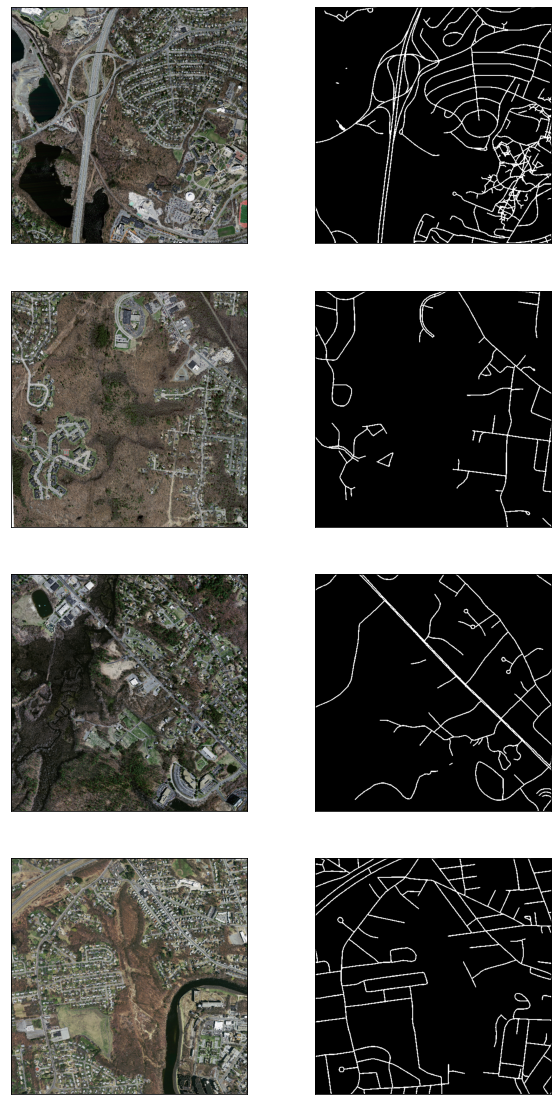

In [11]:
plt.figure(figsize=(10, 20))
#plt.tight_layout()
for i in range(4):
    idx = np.random.randint(0, len(test_dataset))
    img, mask = test_dataset[idx]
    plt.subplot(4, 2, i*2+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4, 2, i*2+2)
    plt.imshow(mask, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()